In [2]:
import numpy as np
import cv2
from skimage.draw import circle, disk, rectangle
from skimage import data, img_as_float
from skimage.util import random_noise
from matplotlib import pyplot as plt
import os

In [3]:
def generate_circle_img(sigma_range, center_extent, radius_extent, amount = 0, mode = 'gaussian', debug = False):
    center_coords = np.random.randint(*center_extent,2)
    radius = np.random.randint(radius_extent)
    

    rr, cc = disk((center_coords[0], center_coords[1]), radius)
    

    img = np.zeros((256,256), dtype=np.float32)
    mask = np.zeros((256,256), dtype=np.uint8)
    
    sigma = np.random.uniform(*sigma_range )
    amount = amount
    img = img_as_float(img)
    
    if mode == 'gaussian':
        noise = random_noise(img, var= sigma, mode = mode)
    else:
        noise = random_noise(img, amount= 0.5, mode = mode)
    
    img[rr, cc] = noise[rr, cc]
    mask[rr, cc] = 1

    if debug == True:
        plt.subplot(1,2,1)
        plt.imshow(img)

        plt.subplot(1,2,2)
        plt.imshow(mask)
        
    return img, mask

def generate_rect_img(sigma_range, start_extent, extent, amount = 0, mode = 'gaussian', debug = False):
    start_coords = np.random.randint(*start_extent, 2)
    extent = np.random.randint(extent)
    
    rr, cc = rectangle((start_coords[0], start_coords[1]), extent)
    
    img = np.zeros((256,256), dtype=np.float32)
    mask = np.zeros((256,256), dtype=np.uint8)
    
    sigma = np.random.uniform(*sigma_range )
    amount = amount
    img = img_as_float(img)
    
    if mode == 'gaussian':
        noise = random_noise(img, var= sigma, mode = mode)
    else:
        noise = random_noise(img, amount= 0.5, mode = mode)
        
    img[rr, cc] = noise[rr, cc]
    mask[rr, cc] = 1

    if debug == True:
        plt.subplot(1,2,1)
        plt.imshow(img)

        plt.subplot(1,2,2)
        plt.imshow(mask)
        
    return img, mask

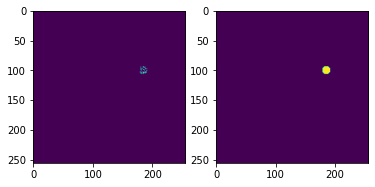

In [4]:
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.04, 0.06]

img, mask = generate_circle_img(sigma_range, center_extent, radius_extent, mode = 's&p', debug = True)

# start = (64, 192)
# extent = 64

# img, mask = generate_rect_img(sigma_range, start, extent, debug = True)

In [5]:
os.makedirs("data/syntheticSegmentation/", exist_ok = True)

#### Training/Testing Domains

**Training Dom 1:** 

Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.04, 0.06]  

---

**Training Dom 2:** 

Set 1 (80%):
Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.04, 0.06]  

Set 2 (20%):
Only rectangles with the following noise parameters  
start = (64, 192)  
extent = 64  
sigma_range = [0.04, 0.06]  
Catch: mask for rectange = 0

---


**Small Training Dom n:** 

set 1 : {0.85, 0.97, 4}
total_size = 256

Set 1 (n):
Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.04, 0.06]  

Set 2 (1-n):
Only rectangles with the following noise parameters  
start = (64, 192)  
extent = 64  
sigma_range = [0.04, 0.06]  
Catch: mask for rectange = 0

---


**Testing Dom 1:** 

Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.04, 0.06]  

---


**Testing Dom 2:** 

Only rectangles with the following noise parameters  
start = (64, 192)  
extent = 64  
sigma_range = [0.04, 0.06]  

---


**Testing Dom 3:** 

Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.08, 0.12]  

---

**Testing Dom 4:** 

Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.28, 0.32]  

---

**Testing Dom 5:** 

Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.08, 0.12]  * 10

---

**Testing Dom 6:** 

Only circles with the following noise parameters  
center_extent = (64, 192)  
radius_extent = 64  
sigma_range = [0.08, 0.12]   + 10

---

**Testing Dom 7:** 

Only rectangles with the following noise parameters  
start = (64, 192)  
extent = 64  
sigma_range = [0.04, 0.06]  *10

---
----

#### Simplicity bias Testing Experiments

**Training Set** 

n_images = 1024

Invariant Feature: Geometry : {circle, rectangle}
Spurious Feature: Texture: {gaussian, s&p}

start = (64, 192)  
extent = 64  
sigma_range = [0.04, 0.06]

Percentage of spurious features: {0.85, 0.89, 0.93, 0.97}

**Test Set** 

n_images = 512

Invariant Feature: Geometry : {circle, rectangle}
Spurious Feature: Texture: {gaussian, s&p}

start = (64, 192)  
extent = 64  
sigma_range = [0.04, 0.06]

Percentage of spurious features: 0.5






#### Training set: Domain 1

In [10]:
# generate the training set

center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.04, 0.06]

n_train = 1024
train_x = np.zeros((n_train, 1, 256, 256), dtype=np.float32)
train_y = np.zeros((n_train, 1, 256, 256), dtype = np.uint8)
for i in range(n_train):
    img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
    train_x[i,0] = img
    train_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/train_dom1", x=train_x, y=train_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

#### Test set: Domain 1

In [6]:
#test generator parameters
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.04, 0.06]

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
    test_x[i,0] = img
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom1", x=test_x, y=test_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

#### Test set: Domain 2

In [9]:
#test generator parameters
start_extent = (64, 192)
extent = 64
sigma_range = [0.04, 0.06]

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_rect_img(sigma_range, start_extent, extent)
    test_x[i,0] = img
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom2", x=test_x, y=test_y, start_extent=start_extent, extent=extent, sigma_range=sigma_range)

#### Test set: Domain 3

In [8]:
#test generator parameters
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.08, 0.12]

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
    test_x[i,0] = img
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom3", x=test_x, y=test_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

#### Test set: Domain 4

In [4]:
#test generator parameters
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.28, 0.32]

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
    test_x[i,0] = img
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom4", x=test_x, y=test_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


#### Test set: Domain 5

In [7]:
#test generator parameters
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.08, 0.12]

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
    test_x[i,0] = img*10.0
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom5", x=test_x, y=test_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

#### Test set: Domain 6

In [8]:
#test generator parameters
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.08, 0.12]

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
    test_x[i,0] = img + 10.0
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom6", x=test_x, y=test_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

#### Train set: Domain 2

In [12]:
# generate the training set
n_train = 1024

n_circ = int(0.8*n_train)

#circle parameters
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.04, 0.06]

train_x = np.zeros((n_train, 1, 256, 256), dtype=np.float32)
train_y = np.zeros((n_train, 1, 256, 256), dtype = np.uint8)
for i in range(n_circ):
    img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
    train_x[i,0] = img
    train_y[i,0] = mask
    
#rectangle paramters
start_extent = (64, 192)
extent = 64
sigma_range = [0.04, 0.06]

n_rect = n_train - n_circ

for i in range(n_circ, n_train):
    img, mask = generate_rect_img(sigma_range, start_extent, extent)
    train_x[i,0] = img
    #NOTE: no train_y
    
np.savez("data/syntheticSegmentation/train_dom2", x=train_x, y=train_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

#### Train set: Domain n

In [4]:
# generate the training set
n_train = 1024

for perc in np.arange(0.85, 1, 0.04):
    n_circ = int(perc*n_train)

    #circle parameters
    center_extent = (64, 192)
    radius_extent = 64
    sigma_range = [0.04, 0.06]

    train_x = np.zeros((n_train, 1, 256, 256), dtype=np.float32)
    train_y = np.zeros((n_train, 1, 256, 256), dtype = np.uint8)
    for i in range(n_circ):
        img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
        train_x[i,0] = img
        train_y[i,0] = mask

    #rectangle paramters
    start_extent = (64, 192)
    extent = 64
    sigma_range = [0.04, 0.06]

    n_rect = n_train - n_circ

    for i in range(n_circ, n_train):
        img, mask = generate_rect_img(sigma_range, start_extent, extent)
        train_x[i,0] = img
        #NOTE: no train_y

    np.savez("data/syntheticSegmentation/train_dom2_%s"%str(perc), x=train_x, y=train_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


In [4]:
# generate the training set
n_train = 256

for perc in np.arange(0.85, 1, 0.04):
    n_circ = int(perc*n_train)

    #circle parameters
    center_extent = (64, 192)
    radius_extent = 64
    sigma_range = [0.04, 0.06]

    train_x = np.zeros((n_train, 1, 256, 256), dtype=np.float32)
    train_y = np.zeros((n_train, 1, 256, 256), dtype = np.uint8)
    for i in range(n_circ):
        img, mask = generate_circle_img(sigma_range, center_extent, radius_extent)
        train_x[i,0] = img
        train_y[i,0] = mask

    #rectangle paramters
    start_extent = (64, 192)
    extent = 64
    sigma_range = [0.04, 0.06]

    n_rect = n_train - n_circ

    for i in range(n_circ, n_train):
        img, mask = generate_rect_img(sigma_range, start_extent, extent)
        train_x[i,0] = img
        #NOTE: no train_y

    np.savez("data/syntheticSegmentation/small_train_dom2_%s"%str(perc), x=train_x, y=train_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


In [8]:
#test generator parameters
start_extent = (64, 192)
extent = 64
sigma_range = np.asarray([0.04, 0.06])*10

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_rect_img(sigma_range, start_extent, extent)
    test_x[i,0] = img
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom7", x=test_x, y=test_y, start_extent=start_extent, extent=extent, sigma_range=sigma_range)

In [11]:
#test generator parameters
start_extent = (64, 192)
extent = 64
sigma_range = np.asarray([0.08, 0.12])

n_test = 256
test_x = np.zeros((n_test, 1, 256, 256), dtype=np.float32)
test_y = np.zeros((n_test, 1, 256, 256), dtype = np.uint8)
for i in range(n_test):
    img, mask = generate_rect_img(sigma_range, start_extent, extent)
    test_x[i,0] = img
    test_y[i,0] = mask
    
np.savez("data/syntheticSegmentation/test_dom8", x=test_x, y=test_y, start_extent=start_extent, extent=extent, sigma_range=sigma_range)

## Simplicity bias Experiments

#### Training Dataset

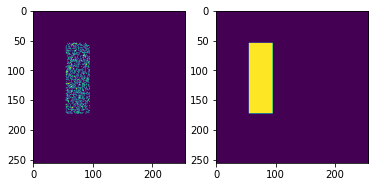

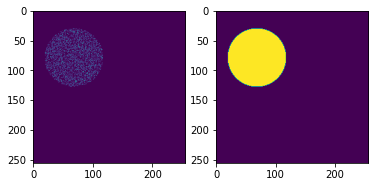

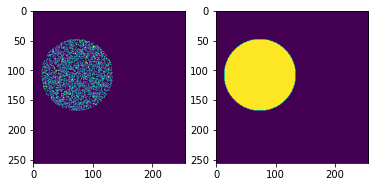

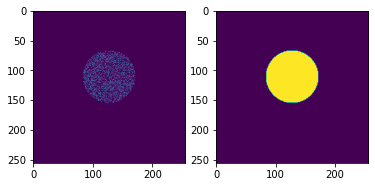

In [39]:
# Training Set

# n_images = 1024

# Invariant Feature: Geometry : {circle, rectangle} Spurious Feature: Texture: {gaussian, s&p}

# start = (64, 192)
# extent = 64
# sigma_range = [0.04, 0.06]

# Percentage of spurious features: {0.85, 0.89, 0.93, 0.97}

# Test Set

# n_images = 512

# Invariant Feature: Geometry : {circle, rectangle} Spurious Feature: Texture: {gaussian, s&p}

# start = (64, 192)
# extent = 64
# sigma_range = [0.04, 0.06]

# Percentage of spurious features: 0.5

debug = True    
# generate the training set
n_train = 1024

for perc in np.arange(0.85, 1, 0.04):
    n_circ = n_train//2
    n_rect = n_train - n_circ

    train_x = np.zeros((n_train, 1, 256, 256), dtype=np.float32)
    train_y = np.zeros((n_train, 2, 256, 256), dtype = np.uint8)
    
    #circle parameters
    center_extent = (64, 192)
    radius_extent = 64
    sigma_range = [0.04, 0.06]

    amount = 0.5
    
    for i in range(n_circ):
        mode = 'gaussian'
        if np.random.random(1)[0] > perc:
            mode = 's&p'
        img, mask = generate_circle_img(sigma_range, center_extent, radius_extent, amount, mode)
        train_x[i,0] = img
        train_y[i,0] = mask

    #rectangle paramters
    start_extent = (64, 192)
    extent = 64

    
    for i in range(n_circ, n_train):
        mode = 's&p'
        if np.random.random(1)[0] > perc:
            mode = 'gaussian'
        
        img, mask = generate_rect_img(sigma_range, start_extent, extent, amount, mode)
        train_x[i,0] = img
        train_y[i,1] = mask

    np.savez("data/syntheticSegmentation/simple_train_dom1_%0.2f"%(perc), x=train_x, y=train_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)
    
    if debug:
        rand_num = np.random.randint(n_train)
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(train_x[rand_num,0])
        
        plt.subplot(1,2,2)
        plt.imshow(train_y[rand_num,0] + train_y[rand_num,1])
    

#### Test Dataset for simplicity bias

/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


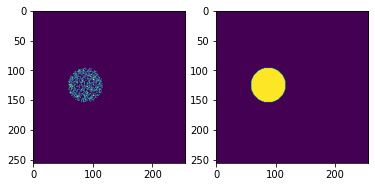

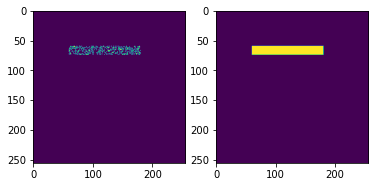

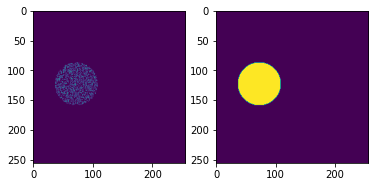

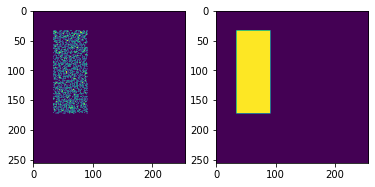

In [3]:
# Test Set

# n_images = 1024

# Invariant Feature: Geometry : {circle, rectangle} Spurious Feature: Texture: {gaussian, s&p}

# start = (64, 192)
# extent = 64
# sigma_range = [0.04, 0.06]

# Percentage of spurious features: {0.85, 0.89, 0.93, 0.97}

# Test Set

# n_images = 512

# Invariant Feature: Geometry : {circle, rectangle} Spurious Feature: Texture: {gaussian, s&p}

# start = (64, 192)
# extent = 64
# sigma_range = [0.04, 0.06]

# Percentage of spurious features: 0.5

debug = True    
# generate the training set
n_train = 1024

for perc in np.arange(0.85, 1, 0.04):
    n_circ = n_train//2
    n_rect = n_train - n_circ

    train_x = np.zeros((n_train, 1, 256, 256), dtype=np.float32)
    train_y = np.zeros((n_train, 2, 256, 256), dtype = np.uint8)
    
    #circle parameters
    center_extent = (64, 192)
    radius_extent = 64
    sigma_range = [0.04, 0.06]

    amount = 0.5
    
    for i in range(n_circ):
        mode = 'gaussian'
        if np.random.random(1)[0] > perc:
            mode = 's&p'
        img, mask = generate_circle_img(sigma_range, center_extent, radius_extent, amount, mode)
        train_x[i,0] = img
        train_y[i,0] = mask

    #rectangle paramters
    start_extent = (64, 192)
    extent = 64

    
    for i in range(n_circ, n_train):
        mode = 's&p'
        if np.random.random(1)[0] > perc:
            mode = 'gaussian'
        
        img, mask = generate_rect_img(sigma_range, start_extent, extent, amount, mode)
        train_x[i,0] = img
        train_y[i,1] = mask

    np.savez("data/syntheticSegmentation/simple_test_dom1_%s"%str(perc), x=train_x, y=train_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)
    
    if debug:
        rand_num = np.random.randint(n_train)
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(train_x[rand_num,0])
        
        plt.subplot(1,2,2)
        plt.imshow(train_y[rand_num,0] + train_y[rand_num,1])
    

#### Generate Synthetic data to test all cases

circle gaussian


/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/home/rahulv/codes/robustdg/robustdg/lib/python3.7/site-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


circle s&p
rectange gaussian
rectange s&p


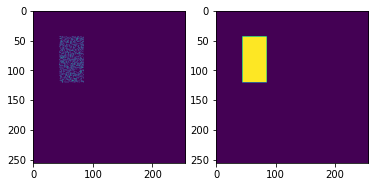

In [6]:
# Test Set

# n_images = 1024

# Invariant Feature: Geometry : {circle, rectangle} Spurious Feature: Texture: {gaussian, s&p}

# start = (64, 192)
# extent = 64
# sigma_range = [0.04, 0.06]

# Percentage of spurious features: {0.85, 0.89, 0.93, 0.97}

# Test Set

# n_images = 512

# Invariant Feature: Geometry : {circle, rectangle} Spurious Feature: Texture: {gaussian, s&p}

# start = (64, 192)
# extent = 64
# sigma_range = [0.04, 0.06]

# Percentage of spurious features: 0.5

#circle parameters
center_extent = (64, 192)
radius_extent = 64
sigma_range = [0.04, 0.06]

#rectangle paramters
start_extent = (64, 192)
extent = 64

debug = True    
# generate the training set
n_train = 1024

textures = ['gaussian', 's&p']
shapes = ['circle', 'rectange']

#s&p parameter
amount = 0.5

train_x = np.zeros((n_train, 1, 256, 256), dtype=np.float32)
train_y = np.zeros((n_train, 2, 256, 256), dtype = np.uint8)
n_samples = n_train//4 #per 'class'

for i, shape in enumerate(shapes):
    for j, texture in enumerate(textures):

        print(shape, texture)

        if shape == 'circle':
            for k in range(i*len(textures)*n_samples + j*n_samples,i*len(textures)*n_samples + j*n_samples + n_samples):
                img, mask = generate_circle_img(sigma_range, center_extent, radius_extent, amount, texture)
                train_x[k,0] = img
                train_y[k,0] = mask            
        else:
            for k in range(i*len(textures)*n_samples + j*n_samples,i*len(textures)*n_samples  + j*n_samples  + n_samples):
                img, mask = generate_rect_img(sigma_range, start_extent, extent, amount, texture)
                train_x[k,0] = img
                train_y[k,1] = mask    

np.savez("data/syntheticSegmentation/simple_balanced_test_dom1.npz", x=train_x, y=train_y, center_extent=center_extent, radius_extent=radius_extent, sigma_range=sigma_range)

if debug:
    rand_num = np.random.randint(n_train)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(train_x[rand_num,0])

    plt.subplot(1,2,2)
    plt.imshow(train_y[rand_num,0] + train_y[rand_num,1])


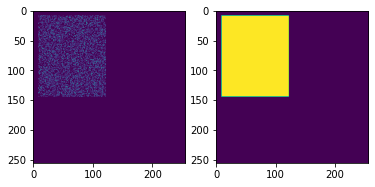

In [33]:
rand_num = np.random.randint(n_train)
rand_num = -315
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_x[rand_num,0])

plt.subplot(1,2,2)
plt.imshow(train_y[rand_num,0] + train_y[rand_num,1])


In [32]:
1024//4


256